In [4]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import optuna
import plotly.express as px

# Visualizing MNIST

In [5]:
#Loading the data
M = loadmat('MNIST_digit_data.mat')
images_train,images_test,labels_train,labels_test= M['images_train'],M['images_test'],M['labels_train'],M['labels_test']

In [3]:
#randomly permute data points
inds = np.random.permutation(images_train.shape[0])
images_train = images_train[inds]
labels_train = labels_train[inds]


inds = np.random.permutation(images_test.shape[0])
images_test = images_test[inds]
labels_test = labels_test[inds]

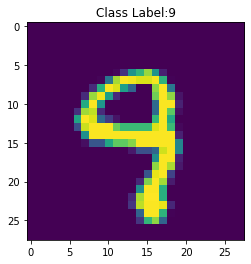

In [4]:
#show the 10'th train image
i=10
im = images_train[i,:].reshape((28,28),order='F')
plt.imshow(im)
plt.title('Class Label:'+str(labels_train[i][0]))
plt.show()

# K Means- Lloyd's Algorithm

### Hyperparameter Tuning

In [14]:
def objective(trial):
    hyperparam = Hyperparameters(
        threshold = trial.suggest_float("threshold", 0.00000000000000001, 0.00000000001)
    )
    model = kMeans(hyperparam)
    model.train(images_train, labels_train)
    return model.accuracy()

### Model Testing

In [57]:
import numpy as np
from scipy.io import loadmat
from scipy import stats as st
import sklearn.metrics

class kMeans:
    def __init__(self, k = 10, threshold=0.001):
        self.threshold = threshold
        self.num_centers = k
    
    def vote(self, cluster):
        return st.mode(self.labels[cluster])
    
    def get_cluster_labels(self):
        clusters = self.__get_clusters()
        labels = [0] * self.num_centers
        for i in range(self.num_centers):
            labels[i] = st.mode(self.labels[clusters[i]])[0][0][0]
        print(labels) 

    def accuracy(self):
        clusters = self.__get_clusters()
        label_pred = [0] * len(self.labels)
        for cluster in clusters:
            cluster_vote = st.mode(self.labels[cluster])[0][0][0]
            for idx in cluster:
                label_pred[idx] = cluster_vote
        return sklearn.metrics.adjusted_rand_score(self.labels.flatten(), np.array(label_pred))


    def train(self, data, labels):
        self.data = data
        self.labels = labels
        self.__initialize_centroids()
        new_centroids = self.__update_centroids()
        # while self.__is_outside_of_threshold(new_centroids):  # update until change is small
        #     self.centers = new_centroids
        #     new_centroids = self.__update_centroids()
        for _ in range(50):  # only 61%
            self.centers = self.__update_centroids()
    
    def __initialize_centroids(self):
        """
        initialize 10 random data points to be 
        the first 10 centers
        """
        init_centers = np.random.randint(low=0, high=self.data.shape[0], size=self.num_centers)
        self.centers = self.data[init_centers]
      
    
    def __get_clusters(self):
        """
        sorts indices of training data into clusters, returns a 2D array of clusters
        """
        clusters = []
        for _ in range(self.num_centers):
            clusters.append([])  # initialize list of clusters
        for i in range(len(self.data)):
            closest_center = 0
            min_distance = np.linalg.norm(self.data[i] - self.centers[0], ord=2)
            for j in range(1, self.num_centers):
                distance = np.linalg.norm(self.data[i] - self.centers[j], ord=2)
                if distance < min_distance:
                    min_distance = distance
                    closest_center = j
            clusters[closest_center].append(i) 
        clusters = np.array([np.array(cluster) for cluster in clusters], dtype='object')  # convert to numpy array
        return clusters 
    
    def __update_centroids(self):
        clusters = self.__get_clusters()
        new_centers = [0] * self.num_centers
        for i in range(self.num_centers):
            cluster = self.data[clusters[i]]
            new_centers[i] = np.average(cluster, axis=0)
        return np.array(new_centers)
    
    def __is_outside_of_threshold(self, new_centers):
        # check that update change is greater than threshold
        delta = np.subtract(new_centers, self.centers)
        if np.average(delta) > self.threshold:
            return True
        return False

In [58]:
model = kMeans()
model.train(images_train, labels_train)

In [59]:
model.get_cluster_labels()

[2, 0, 3, 8, 5, 4, 7, 1, 1, 6]


In [60]:
model.accuracy()

0.39302156371517116

In [27]:
>>> from sklearn.metrics.cluster import adjusted_rand_score
>>> adjusted_rand_score([0, 0, 1, 1], [0, 0, 1, 1])

1.0

In [52]:
labels_train.shape

(60000, 1)